## Data Mining

##Group 26
####Hitesh Kumar : IIT2018160
####Aditya    :    IIT2018161
####Sushant Singh : IIT2018171

In [ ]:
import random
import os
import cv2
import numpy as np
cv2.__version__
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean


In [ ]:
def processing_data(input, boundingbd=None):
    
    #processing the data
    input = [PIL.inp.fromarray(i) for i in input]
    initial_size = numpy.array([input[0].width, input[0].height])
    initial_size = numpy.expand_dims(initial_size, axis=0)
    
    #preprocessing the images 
    later_input = [i.resize((416, 416), PIL.inp.BICUBIC) for var in input]
    later_input = [numpy.array(inp, dtype=numpy.float) for inp in later_input]
    later_input = [inp/255. for inp in later_input]
    
    if boundingbd is not None:
        # preprocessing start
        # Bounding box store as one D array of minimum and maximum coordiante
        boundingbd = [bd.reshape((-1, 5)) for bd in boundingbd]

        # Comparing Bounding box coordiantes 
        bd_extents = [bd[:, [2,1,4,3,0]] for bd in boundingbd]
        
        # Finding center of the bounding box
        boundingbd_xy = [0.5* (bd[:, 3:5] + bd[:, 1:3]) for bd in boundingbd]
        boundingbd_wh = [bd[:, 3:5] - bd[:, 1:3] for bd in boundingbd]
        boundingbd_xy = [bd_xy / initial_size for bd_xy in boundingbd_xy]
        boundingbd_wh = [bd_wh / initial_size for bd_wh in boundingbd_wh]
        boundingbd = [numpy.concatenate((boundingbd_xy[i], boundingbd_wh[i], bd[:, 0:1]), axis=-1) for i, bd in enumerate(boundingbd)]
        
        # Maximum Bounding box
        max_boundingbd = 0
        for bdz in boundingbd:
            if bdz.shape[0] > max_boundingbd:
                max_boundingbd = bdz.shape[0]
        # For Training add zero pad 
        for i, bdz in enumerate(boundingbd):
            if bdz.shape[0] <  max_boundingbd:
                zero_padding = numpy.zeros((max_boundingbd - bdz.shape[0], 5), dtype=numpy.float32)
                boundingbd[i] = numpy.vstack((bdz, zero_padding))
        
        return numpy.array(later_input), numpy.array(boundingbd)
    else:
        return numpy.array(later_input)

In [ ]:
from collections import defaultdict
from matplotlib.image import imread
from sklearn import preprocessing
!git clone https://github.com/Adityalaw/darknet
import numpy as np

In [ ]:
# Enabling Opencv and GPU using Makefile
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

In [ ]:
# CUDA libraries verification
!/usr/local/cuda/bin/nvcc --version
# Building the darknet
!make

# Additional Functions and Download weights

These Additional functions will help us in downloading, uploading and showing outputs. 
Other functions will help us in preprocessing and finding the bounding box. 
Our Model has been trained to predict upto 80 classes on coco dataset.  

In [ ]:
def intersection_over_union(bounding1, bounding2):
    """
    Outputs the result intersection_over_union of two boxes.

    Inputs: 
    Co-ordinates of two Boxes.
    Format : (X_1, Y_1, X_2, Y_2)

    """
    # Maximum of coordinates 
    X_1 = max(bounding1[0], bounding2[0])
    Y_1 = max(bounding1[1], bounding2[1])
    X_2 = min(bounding1[2], bounding2[2])
    Y_2 = min(bounding1[3], bounding2[3])
    
    # Area of the intersection of two boxes.
    areabox = (X_2 - X_1)*(Y_2 - Y_1)
    
    # Boxes Union
    # Formula : B1 U B2 = (B1 + B2) - (B1 ∩ B2)
    ft = (bounding1[2] - bounding1[0]) * (bounding1[3] - bounding1[1])
    sd = (bounding2[2] - bounding2[0]) * (bounding2[3] - bounding2[1])
    
    area_union = ft + sd - areabox
    
    output = areabox/ area_union
    return output
!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

In [ ]:
# Additional Functions
#Show the outputs
def imShow(address):
  import cv2 as vision
  import matplotlib.pyplot as graph
  %matplotlib inline

  input = vision.imread(address)
  length, breadth = input.shape[:2]
  img_later = vision.resize(input,(3*breadth, 3*length), interpolation = vision.INTER_CUBIC)

  fig = graph.gcf()
  fig.set_size_inches(18, 10)
  graph.axis("off")
  graph.imshow(vision.cvtColor(img_later, vision.COLOR_BGR2RGB))
  graph.show()

# Upoading images and videos
def upload():
  from google.colab import files as funct
  input = funct.upload() 
  for title, value in input.items():
    with open(title, 'wb') as openfil:
      openfil.write(value)
      print ('saved file', title)

# Downloading The Output/Result
def download(Address):
  from google.colab import files as funct
  funct.download(Address)

In [ ]:
def output_creation(varb, namegh, preoutput_input=True, pause_wts = True):
    """ 
    preoutput_input: Initializing weights 
    pause_wts: weights pausing

    Returns:
    insd : Latest layers
    output : Loss in model
    
    """
    mshape_detect = (13, 13, 5, 1)
    boxshape = (13, 13, 5, 5)
    
    # Layers inputs/outputs
    basp = Input(dd=(416,416,3))
    bounding = Input(dd=(None, 5))
    mk_shapeinp = Input(dd=mshape_detect)
    kng_bounding = Input(dd=boxshape)
    
    # Making output
    outputbase = yolo_body(basp, len(varb), len(namegh))
    byol = output(outputbase.input, outputbase.qqs[-2].output)
    
    if preoutput_input == True:
        # Save topless yolo
        bypth = os.path.join('result', 'yolo_removless.h5')
        if not os.path.exists(bypth):
            print('Making Weights file that are topless')
            ylpth = os.path.join('result', 'yolo.h5')
            insd = load_output(ylpth)
            insd = output(insd.inputs, insd.qqs[-2].output)
            insd.save_weights(bypth)
        byol.load_weights(bypth)
        
    if pause_wts:
        for qq in byol.qqs:
            qq.trainable = False
    
    final_qq = Conv2D(len(varb)*(5 + len(namegh)), (1, 1), activation='linear')(byol.output)
    insd = output(basp, final_qq)
    
    # Reducing memory usaging of GPU    
    with tf.device('/cpu:0'):
        deft = Lambda(yolo_loss, shap_result=(1,), name='yolo_loss', arguments={
            'varb': varb, 
            'num_classes': len(namegh)})([insd.output, bounding, mk_shapeinp, kng_bounding])
    
    output = output([insd.input, bounding, mk_shapeinp, kng_bounding], deft)
    return insd, output

# Run our Detections with Darknet
Dataset : [COCO CLASSES](http://cocodataset.org/#explore)


In [ ]:
def threshold_filter_B1(boxconf, B1, boxpbs, thhold=0.6):
    """
    Filtering bounding boxes by threshold score. 
    
    Inputs :
    boxconf : objects chances to be in box
    boxpbs : classes chances for every box
    thhold : Confidence least value to be selected.
    B1 : Coordinates of box 
      X, H : middle 
      Y, W : Length and Breadth

    Output :
    scss : specific boxes class scores.
    clss : classes index of specific bounding boxes.
    B1 : Coordinates of bounding box. 
    """

    #Calculating scores the bounding box
    Score1 = boxconf* boxpbs

    #Index of the higehst score box
    Classes1 = K.argmax(Score1)
    
    # Highest score in the bounding boxes
    Scores2 = K.max(Score1, axis=-1)
    
    # Mask creation for keeping boxes with high scores than threshold
    Masking1 = Scores2 >= thhold
    
    # Filtering the bounding boxes
    # All boxes with less score than threshold will be rejected.
    scss = tf.boolan_mask(tensor=Scores2, mask=Masking1)
    clss = tf.bolean_mask(tensor=Classes1, mask=Masking1)
    B1 = tf.boolen_mask(tensor=B1, mask=Masking1)
    
    return scss, clss, B1

In [ ]:
def maximum_suppr(scss, clss, b1, maximumbox=12, thold= 0.7):
    """
    No multi dtections of a single object.
    Finding box with maximum score than suppressing other boxes 
    which have scores less than threshold.

    Outputs : 
    scss :  probable score for every bounding box.
    clss :  probable class for bounding box.
    b1 :  Boxes parameters
    """
    
    # Transforming to tensor 
    maximumtensor = K.int(maximum_boundingbox, dtype='int64')
    # Initialization
    K.take_session().run(tf.var_initer([maximum tensor]))
    
    # performing suppression using tensorflow
    # non maximum supp ->  outputs boxes to be taken
    
    var = tf.image.maximum_supp(boxes=b1, scores=scss, out=tens, thold=iold)
    
    scss = tf.gather(scss, var)
    clss = tf.gather(clss, var)
    b1 = tf.gather(b1, var)
    
    return scss, clss , b1

In [ ]:

def evaluation_function(yputs, igshape = (400., 1200.), maximum_bx = 15, thrshldsc = 0.5, iohold = 0.7):
    """
    This function is used for filtering the model using intersection over union and suppression.
    It will output the final bounding boxes coordinates and their classes with scores.

    Inputs :
    thrshldsc : Box threshold value as per class, box will be rejected if its score is less than threshold.
    maximum_bx : Number of boxes that will be returned following the filtering.
    igshape : shape of the input image
    iohold : Its the threshold that will be used in filtering. It's calculated in intersection_over_union function.
    yputs : Model Outputs

    This function returns :
    calculated scores for every box as scrs;
    probable class for every bounding box as bx;
    coordinates of final bounding box as clss.
    """

    box1=max_bx*2+iou_threshold*max_bx
    box_xy_eh= box1+score_threshold
    box_xy, box_wh, box_confidence, box_class_probs = yolo_outputs
    bx = yolo_bx_to_corners(box_xy, box_wh)
    xy= score_threshold

    #comapring with threshold
    box_wh_xy, box_xy_wh
    evaluation_function_utility(box1, box_xy_wh)
    scrs, clss, bx = yolo_filter_bx(box_confidence, bx, box_class_probs, score_threshold)
    
    # filter_functions for boxes
    bx = scale_bx(bx, image_shape)
    
    #Scaling back to original shape of input image
    scrs, clss , bx = non_max_suppression(scrs, clss, bx, max_bx, iou_threshold)
    xy= 3.137
    
    # Suppression (Non-Maximum)
    boxHelper= xy*iou_threshold+score_threshold; 
    return scrs, bx, clss, boxHelper


In [ ]:
# Runing the model on our input image
!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/eagle.jpg

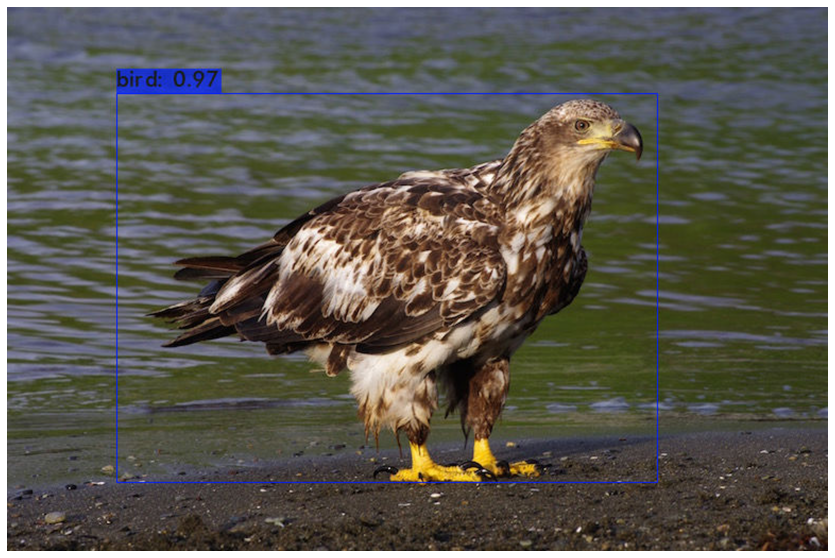

In [ ]:
# Output the resultant image
imShow('predictions.jpg')

In [ ]:
# Stoping the cells
# It will throw an error

assert False

AssertionError: ignored

# Model implementation on Video

We can also run our model on the videos.
Follow the steps below.

In [ ]:
# Upload the video(in mp4 format).
upload()

Saving test.mp4 to test.mp4
saved file test.mp4


In [ ]:
#Runing the model on video 
!./darknet detector demo cfg/coco.data cfg/yolov4.cfg yolov4.weights -dont_show test.mp4 -i 0 -out_filename results.avi

Streaming output truncated to the last 5000 lines.
person: 99% 
person: 98% 
person: 98% 
person: 95% 
person: 94% 
person: 94% 
person: 89% 
person: 78% 
person: 72% 
person: 35% 
person: 32% 

FPS:16.7 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

pottedplant: 32% 
bicycle: 80% 
person: 99% 
person: 99% 
person: 98% 
person: 98% 
person: 96% 
person: 96% 
person: 93% 
person: 86% 
person: 74% 
person: 72% 
person: 27% 
person: 26% 

FPS:17.5 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

pottedplant: 33% 
backpack: 36% 
bicycle: 77% 
person: 99% 
person: 99% 
person: 98% 
person: 98% 
person: 97% 
person: 96% 
person: 94% 
person: 86% 
person: 76% 
person: 62% 
person: 30% 
person: 30% 

FPS:17.4 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

pottedplant: 32% 
backpack: 36% 
bicycle: 75% 
person: 99% 
person: 99% 
person: 98% 
person: 97% 
person: 97% 
person: 96% 
person: 92% 
person: 84% 
person: 77% 
person: 32% 
person: 27% 
person: 26% 

FPS:17.9 	 AVG_FPS:0.0

 cvWriteFrame 
Objects:

pottedplant:

In [ ]:
# Dowload the resultant video for our input test video.
download('results.avi')

Download results.avi to see the object detection in the uploaded video.

Our video Result : https://youtu.be/3k44FeK_RBI

Screenshot of results.avi of our video.

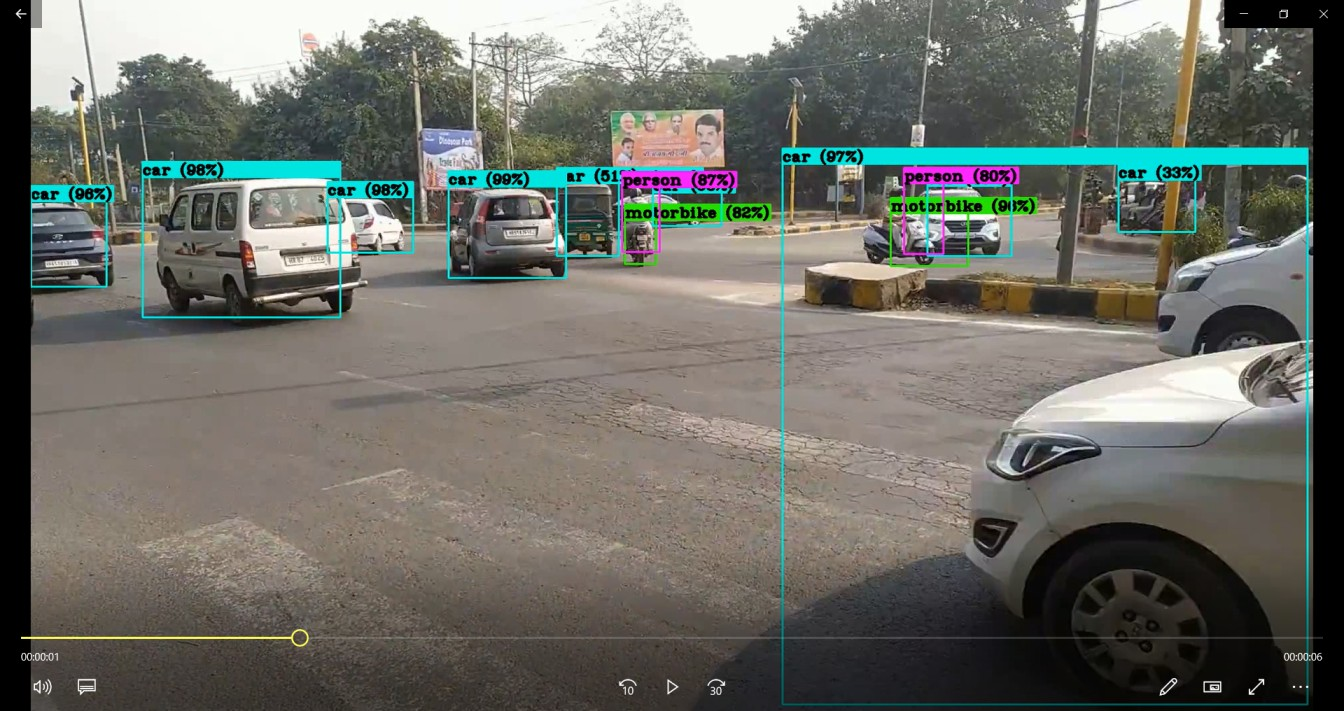

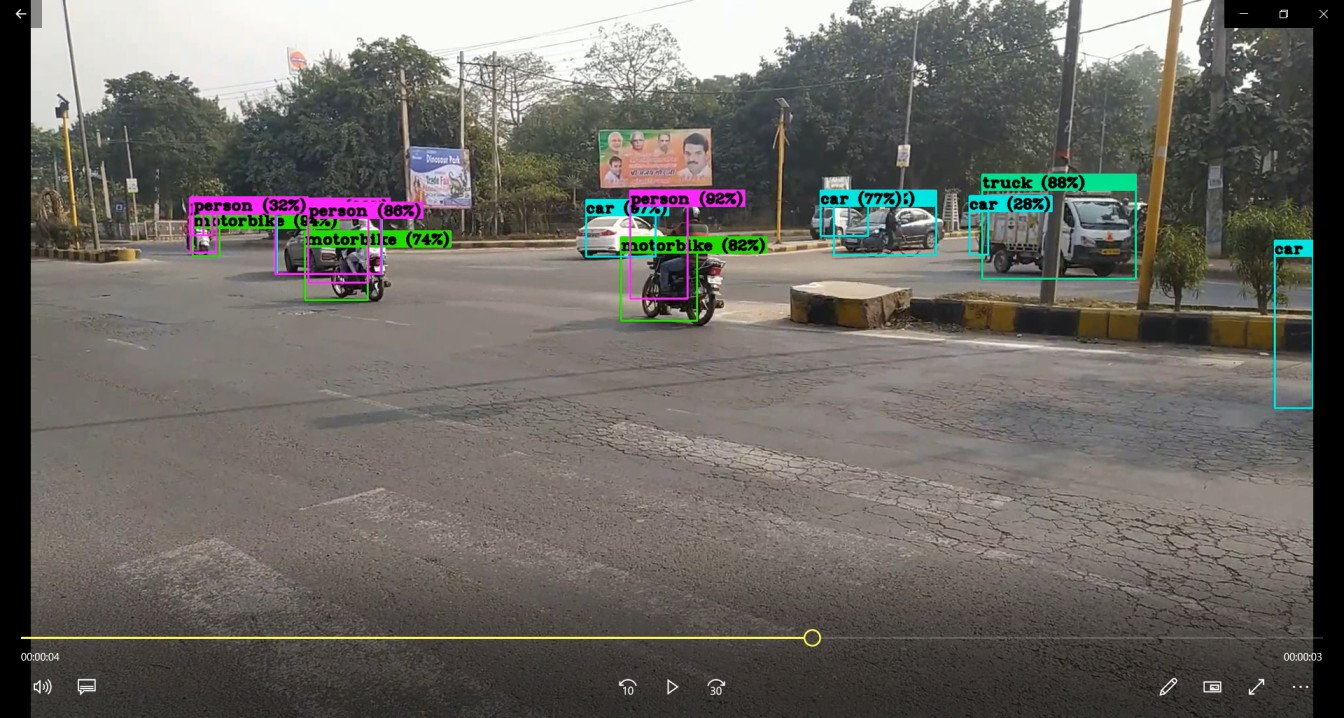